In [1]:
# Residual = y_actual_values - y_predicted_values

# if "y_actual_value > y_predicted_value" then we call it as a +ve Residual
# if "y_actual_value < y_predicted_value" then we call it as a -ve Residual

# Best Fitting Line is the summation of all the +ve & -ve Residuals
# i.e., Σ Residuals = 0

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import r2_score 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# here the X-attribute (i.e., weight) points are linear

df_linear = pd.DataFrame({"age": [1,2,3,4,5], "weight":[7,11,15,19,23]})
df_linear

,age,weight
0,1,7
1,2,11
2,3,15
3,4,19
4,5,23


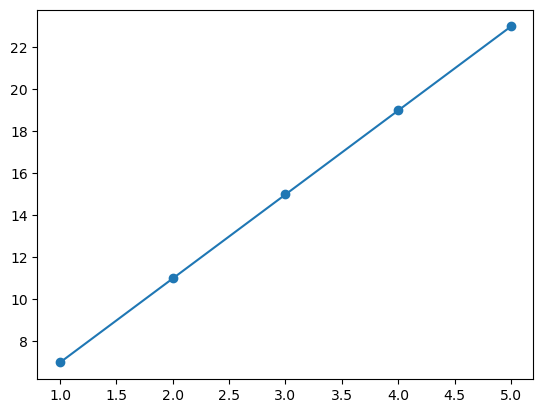

In [4]:
plt.plot('age', 'weight', data=df_linear, marker="o")
plt.show()

In [5]:
# making the model to learn, to predict the weight based on age

model_linear = LinearRegression()
model_linear.fit(df_linear[["age"]], df_linear["weight"])

LinearRegression()

In [6]:
model_linear.score(df_linear[["age"]], df_linear["weight"])

1.0

In [7]:
w, b = model_linear.coef_, model_linear.intercept_
w, b

(array([4.]), 2.9999999999999964)

In [8]:
model_linear.predict(np.array([[10],[15],[21]]))

array([43., 63., 87.])

In [9]:
y_predict_linear = model_linear.predict(df_linear[['age']])
y_predict_linear

array([ 7., 11., 15., 19., 23.])

In [10]:
SSE_reg = np.sum((df_linear.weight-y_predict_linear)**2)
SSE_reg

1.0255191767873153e-29

In [11]:
SSE_total = np.sum((df_linear.weight-np.mean(df_linear.weight))**2)
SSE_total

160.0

In [12]:
# percentage of variation which was unable to be explained by our Regression line

(SSE_reg/SSE_total)

6.409494854920721e-32

In [13]:
# percentage of variation which was able to be explained by our Regression line

r2_linear = 1-(SSE_reg/SSE_total)
r2_linear

1.0

In [14]:
df_linear.weight.values

array([ 7, 11, 15, 19, 23], dtype=int64)

In [15]:
w, w[0]

(array([4.]), 4.000000000000001)

In [16]:
# manually calculating the weight instead of predicting after the model has trained.

df_linear.age*w[0]+b

0     7.0
1    11.0
2    15.0
3    19.0
4    23.0
Name: age, dtype: float64

In [17]:
# here the X-attribute (i.e., weight) points are not linear

df_non_linear = pd.DataFrame({"age": [1,2,3,4,5], "weight":[8,17,12,34,25]})
df_non_linear

,age,weight
0,1,8
1,2,17
2,3,12
3,4,34
4,5,25


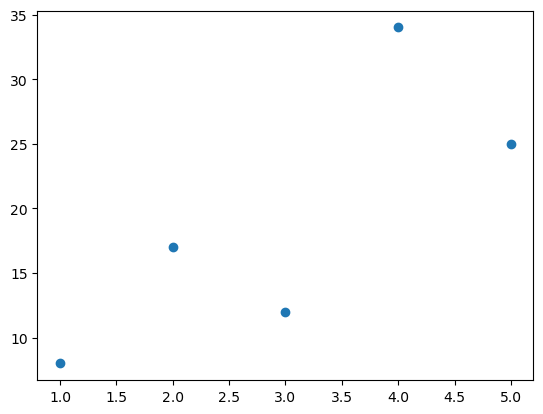

In [18]:
plt.scatter('age', 'weight', data=df_non_linear, marker="o")
plt.show()

In [19]:
# making the model to learn, to predict the weight based on age

model_non_linear = LinearRegression()
model_non_linear.fit(df_non_linear[["age"]], df_non_linear["weight"])

LinearRegression()

In [20]:
w1, b1 = model_non_linear.coef_, model_non_linear.intercept_
w1, b1

(array([5.1]), 3.8999999999999986)

In [21]:
y_predict_non_linear = model_non_linear.predict(df_non_linear[['age']])
y_predict_non_linear

array([ 9. , 14.1, 19.2, 24.3, 29.4])

In [22]:
SSE_Reg = np.sum((df_non_linear.weight-y_predict_non_linear)**2)
SSE_Reg

174.7

In [23]:
SSE_Total = np.sum((df_non_linear.weight-df_non_linear.weight.mean())**2)
SSE_Total

434.79999999999995

In [24]:
# 40% percentage of variation which was unable to be explained by our Regression line

SSE_Reg/SSE_Total

0.4017939282428703

In [25]:
# Approx 59% percentage of variation which was able to be explained by our Regression line

r2_non_linear = 1-SSE_Reg/SSE_Total
r2_non_linear

0.5982060717571297

In [26]:
model_non_linear.score(df_non_linear[["age"]], df_non_linear["weight"])

0.5982060717571297

In [27]:
df_non_linear.weight.values

array([ 8, 17, 12, 34, 25], dtype=int64)

In [28]:
# manually calculating the residual values

df_non_linear.weight.values - y_predict_non_linear

array([-1. ,  2.9, -7.2,  9.7, -4.4])

In [29]:
# summation of all the +ve & -ve Residuals

np.sum(df_non_linear.weight.values - y_predict_non_linear)

-1.7763568394002505e-15

In [30]:
(-1+2.9+(-7.2)+9.7+(-4.4))

-1.7763568394002505e-15

In [31]:
np.allclose(-1.7763568394002505e-15, 0)

True

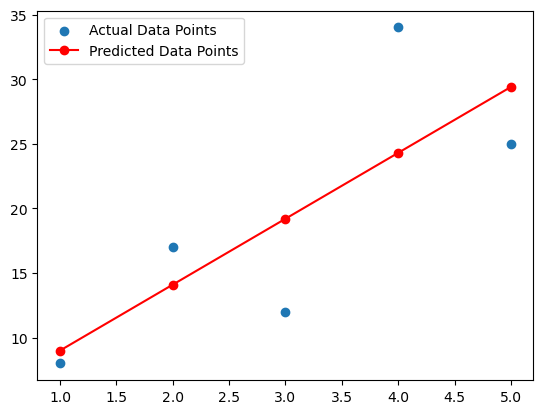

In [32]:
plt.scatter('age', 'weight', data=df_non_linear, marker="o",label="Actual Data Points")
plt.plot(df_non_linear.age, y_predict_non_linear, marker="o", c="red", label="Predicted Data Points")
plt.legend()
plt.show()

In [33]:
insurance=pd.read_csv("E:/Python Programs/insurance.csv")
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
insurance.shape

(1338, 7)

In [35]:
insurance.describe()[['age','charges','bmi', "children"]]

,age,charges,bmi,children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,13270.422265,30.663397,1.094918
std,14.049960,12110.011237,6.098187,1.205493
min,18.000000,1121.873900,15.960000,0.000000
25%,27.000000,4740.287150,26.296250,0.000000
50%,39.000000,9382.033000,30.400000,1.000000
75%,51.000000,16639.912515,34.693750,2.000000
max,64.000000,63770.428010,53.130000,5.000000


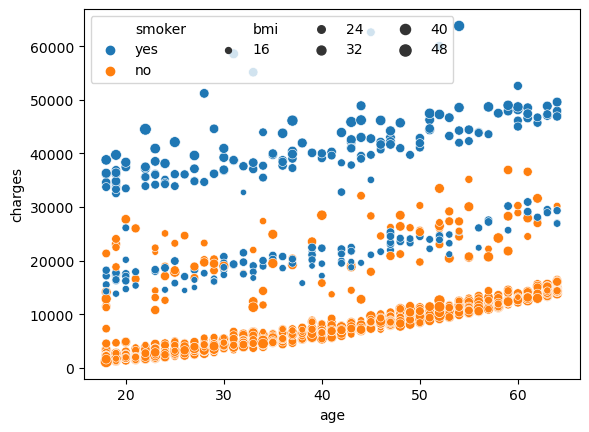

In [42]:
sns.scatterplot(data=insurance, x="age",y="charges",hue="smoker", size="bmi")
plt.legend(ncols=4)
plt.show()

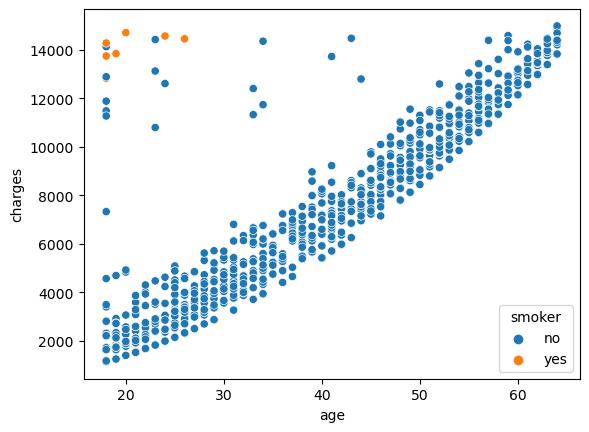

In [45]:
sns.scatterplot(x="age",y="charges",data=insurance[insurance.charges<15000],hue="smoker")
plt.show()

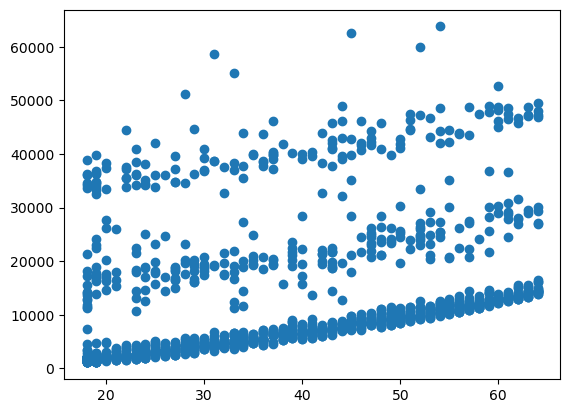

In [37]:
plt.scatter(x="age",y="charges", data=insurance)
plt.show()

In [46]:
X = insurance[['age']]
y = insurance['charges']

In [47]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [48]:
w, b = model.coef_, model.intercept_
w, b

(array([257.72261867]), 3165.885006063021)

In [54]:
y_predict_manually = X.age*w[0]+b
y_predict_manually.values

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

In [60]:
y.values

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [51]:
y_predict = model.predict(X[["age"]])
y_predict

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

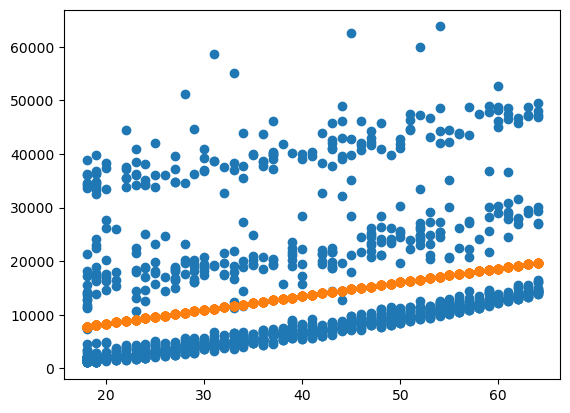

In [53]:
plt.scatter(x='age', y='charges', data=insurance)
plt.scatter(X.age, y_predict)
plt.show()

In [61]:
model.score(X,y)

0.08940589967885804

In [64]:
r2_score(y,y_predict)

0.08940589967885804

In [66]:
insurance.groupby("smoker").describe()["charges"]

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


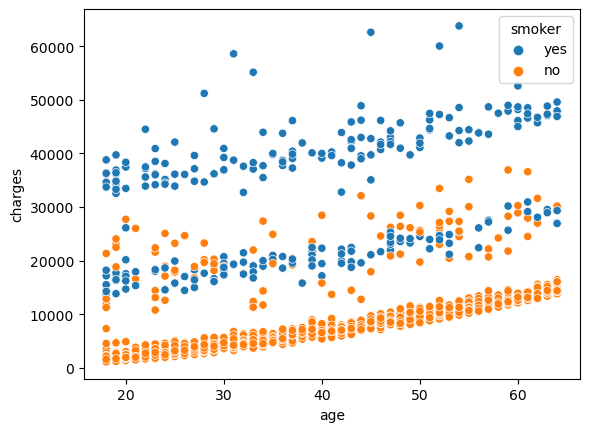

In [67]:
sns.scatterplot(x='age', y='charges', data=insurance, hue='smoker')
plt.show()

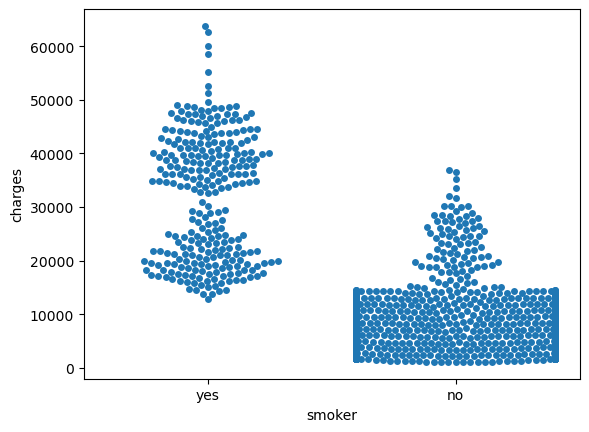

In [68]:
sns.swarmplot(data=insurance, x='smoker', y='charges')
plt.show()

In [71]:
insurance = pd.get_dummies(data=insurance, columns=['smoker'], dtype='int32')
insurance

,age,gender,bmi,children,region,charges,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,0,1
1,18,male,33.770,1,southeast,1725.55230,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0
4,32,male,28.880,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,1,0
1334,18,female,31.920,0,northeast,2205.98080,1,0
1335,18,female,36.850,0,southeast,1629.83350,1,0
1336,21,female,25.800,0,southwest,2007.94500,1,0


In [72]:
X = insurance[["age", "smoker_yes"]]
y = insurance['charges']

In [73]:
model.fit(X,y)

LinearRegression()

In [74]:
w, b = model.coef_, model.intercept_
w, b

(array([  274.87118587, 23855.30481666]), -2391.6263593585463)

In [76]:
y_predict_manually = X.age*w[0]+X.smoker_yes*w[1]+b
y_predict_manually.values

array([26686.23098893,  2556.05498639,  5304.76684514, ...,
        2556.05498639,  3380.66854402, 38230.82079568])

In [77]:
y.values

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [78]:
y_predict=model.predict(X)
y_predict

array([26686.23098893,  2556.05498639,  5304.76684514, ...,
        2556.05498639,  3380.66854402, 38230.82079568])

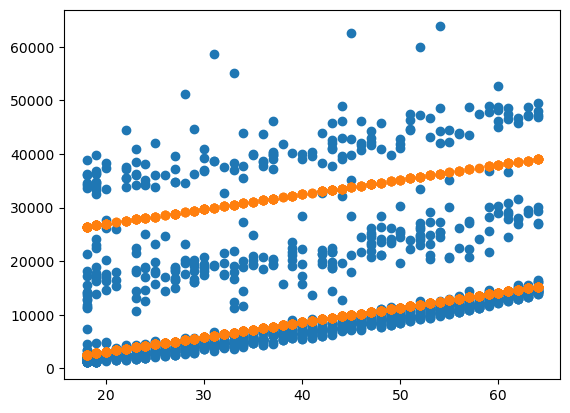

In [81]:
plt.scatter(x='age', y='charges', data=insurance)
plt.scatter(X.age, y_predict)
plt.show()

In [82]:
model.score(X,y)

0.7214008260577199

In [84]:
insurance['bmi_30'] = insurance.bmi.apply(lambda x: 1 if x>=30 else 0)
insurance.head()

,age,gender,bmi,children,region,charges,smoker_no,smoker_yes,bmi_30
0,19,female,27.900,0,southwest,16884.92400,0,1,0
1,18,male,33.770,1,southeast,1725.55230,1,0,1
2,28,male,33.000,3,southeast,4449.46200,1,0,1
3,33,male,22.705,0,northwest,21984.47061,1,0,0
4,32,male,28.880,0,northwest,3866.85520,1,0,0


In [85]:
X = insurance[["age", "smoker_yes", "bmi_30"]]
y = insurance['charges']

In [86]:
model.fit(X,y)

LinearRegression()

In [87]:
model.score(X,y)

0.7510542445314582

In [88]:
w, b = model.coef_, model.intercept_
w, b

(array([  262.09787358, 23839.98457577,  4191.33861417]), -4102.391280526499)

In [89]:
y_predict=model.predict(X)
y_predict

array([24717.45289326,  4806.70905808,  7427.68779388, ...,
        4806.70905808,  1401.66406465, 35725.56358362])

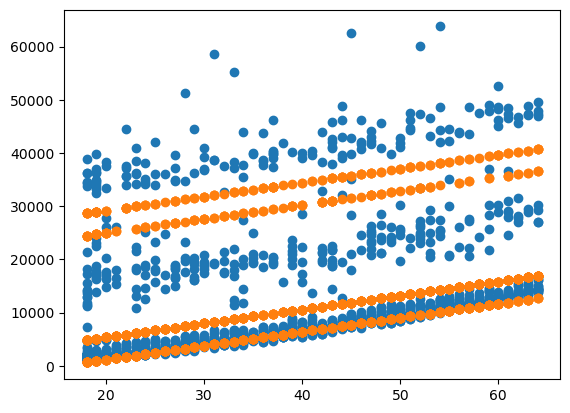

In [90]:
plt.scatter(x='age', y='charges', data=insurance)
plt.scatter(X.age, y_predict)
plt.show()

In [92]:
insurance.head()

,age,gender,bmi,children,region,charges,smoker_no,smoker_yes,bmi_30
0,19,female,27.900,0,southwest,16884.92400,0,1,0
1,18,male,33.770,1,southeast,1725.55230,1,0,1
2,28,male,33.000,3,southeast,4449.46200,1,0,1
3,33,male,22.705,0,northwest,21984.47061,1,0,0
4,32,male,28.880,0,northwest,3866.85520,1,0,0


In [95]:
insurance['bmi_30_smoker'] = insurance.apply(lambda row: 1 if row.smoker_yes==1 and row.bmi_30==1 else 0, axis=1)
insurance.head()

,age,gender,bmi,children,region,charges,smoker_no,smoker_yes,bmi_30,bmi_30_smoker
0,19,female,27.900,0,southwest,16884.92400,0,1,0,0
1,18,male,33.770,1,southeast,1725.55230,1,0,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0,0,0
4,32,male,28.880,0,northwest,3866.85520,1,0,0,0


In [96]:
X = insurance[["age", "smoker_yes", "bmi_30_smoker"]]
y = insurance['charges']

In [97]:
model.fit(X,y)
model.score(X,y)

0.8584922811178519

In [98]:
w, b = model.coef_, model.intercept_
w, b

(array([  268.22050372, 13346.2678987 , 19847.51295014]), -2129.686992276811)

In [104]:
y_predict = X.age*w[0]+X.smoker_yes*w[1]+X.bmi_30_smoker*w[2]+b
y_predict.values

array([16312.77047702,  2698.2820746 ,  5380.48711176, ...,
        2698.2820746 ,  3502.94358575, 27578.03163307])

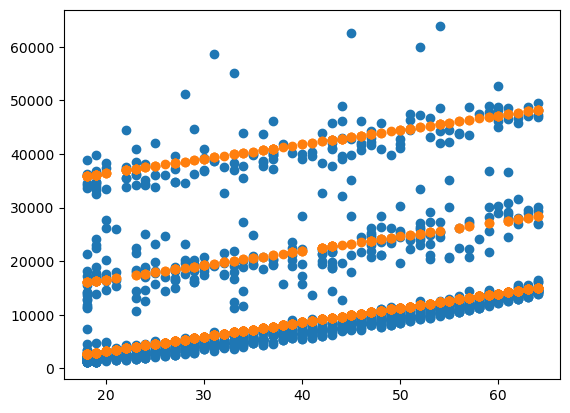

In [105]:
plt.scatter(x='age', y='charges', data=insurance)
plt.scatter(X.age, y_predict)
plt.show()

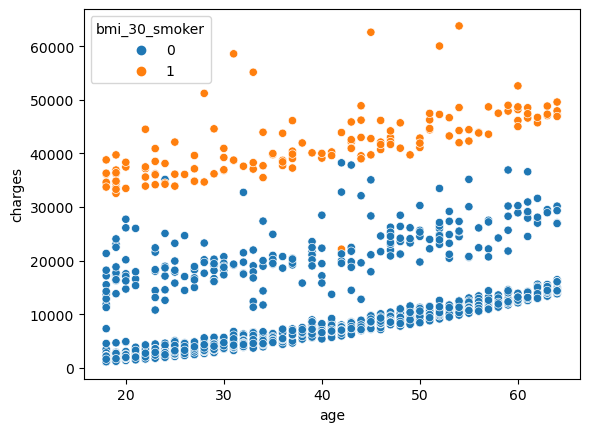

In [106]:
sns.scatterplot(x='age', y='charges', data=insurance, hue='bmi_30_smoker')
plt.show()

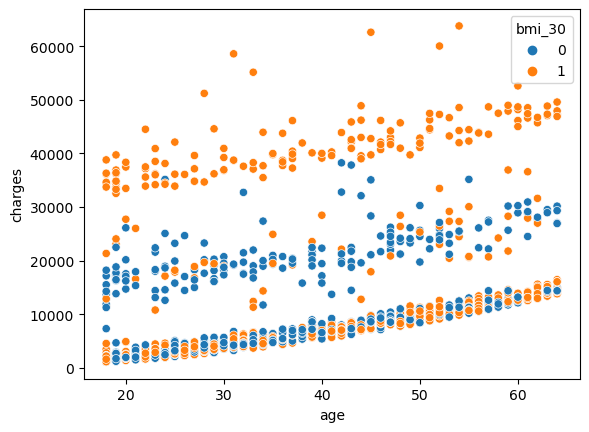

In [107]:
sns.scatterplot(x='age', y='charges', data=insurance, hue='bmi_30')
plt.show()

In [108]:
insurance['children_yes'] = insurance.children.apply(lambda x: 1 if x>0 else 0)
insurance.head()

,age,gender,bmi,children,region,charges,smoker_no,smoker_yes,bmi_30,bmi_30_smoker,children_yes
0,19,female,27.900,0,southwest,16884.92400,0,1,0,0,0
1,18,male,33.770,1,southeast,1725.55230,1,0,1,0,1
2,28,male,33.000,3,southeast,4449.46200,1,0,1,0,1
3,33,male,22.705,0,northwest,21984.47061,1,0,0,0,0
4,32,male,28.880,0,northwest,3866.85520,1,0,0,0,0


In [109]:
X = insurance[["age", "smoker_yes", "bmi_30_smoker", "children_yes"]]
y = insurance['charges']

In [110]:
model.fit(X,y)
model.score(X,y)

0.8603361689944753

In [111]:
w, b = model.coef_, model.intercept_
w, b

(array([  266.46471511, 13330.09124215, 19851.97852317,  1051.5028444 ]),
 -2658.428668733528)

In [112]:
y_predict = X.age*w[0]+X.smoker_yes*w[1]+X.bmi_30_smoker*w[2]+X.children_yes*w[3]+b
y_predict.values

array([15734.49216059,  3189.43904773,  5854.08619888, ...,
        2137.93620333,  2937.33034867, 26926.0101954 ])

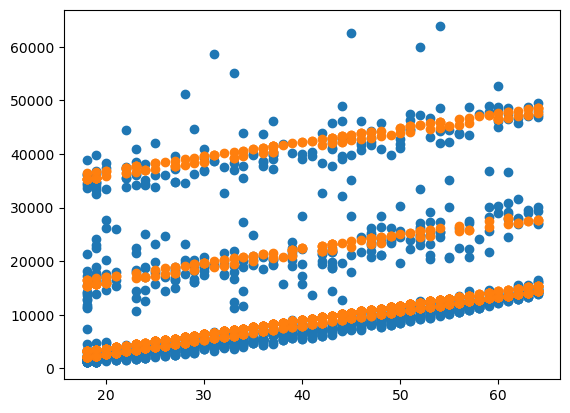

In [113]:
plt.scatter(x='age', y='charges', data=insurance)
plt.scatter(X.age, y_predict)
plt.show()

In [130]:
X.head()

,age,smoker_yes,bmi_30_smoker,children_yes
0,19,1,0,0
1,18,0,0,1
2,28,0,0,1
3,33,0,0,0
4,32,0,0,0


In [131]:
X.shape

(1338, 4)

In [132]:
X.T.head()

,0,1,2,3,4,5,6,7,8,9,...,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,19,18,28,33,32,31,46,37,37,60,...,23,52,57,23,52,50,18,18,21,61
smoker_yes,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
bmi_30_smoker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
children_yes,0,1,1,0,0,0,1,1,1,0,...,1,1,1,0,1,1,0,0,0,0


In [133]:
X.T.shape

(4, 1338)

In [134]:
w

array([  266.46471511, 13330.09124215, 19851.97852317,  1051.5028444 ])

In [135]:
w.shape

(4,)

In [136]:
X.shape, w.shape

((1338, 4), (4,))

In [139]:
y_predict= X.dot(w)+b
y_predict.values

array([15734.49216059,  3189.43904773,  5854.08619888, ...,
        2137.93620333,  2937.33034867, 26926.0101954 ])